# 안녕하세요^^ 
## AIVLE '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

# 데이터 분석부터 먼저 시작해보겠습니다.
## "구별 업종 등록 데이터" 를 확인해 보도록 하겠습니다

In [ ]:
# 필요 라이브러리부터 설치합니다.
# %pip install pandas seaborn

## 기본전제
* 처음에 제공되는 기본/추가 데이터는 'raw_data' 폴더에 있습니다.

[기본 데이터]
* 1.4 business_type_202401.csv

[데이터 소개]
* 서울 시 구별 등록 업종 상위 10개 데이터(제공 가능한 최신 버전)
    * 택시 운송업 (개인택시 등록자 주거지)
    * 한식일반음식점업
    * 용달 화물자동차 운송업(개인용달 등록자 주거지)
    * 부동산 중개 및 대리업
    * 두발미용업
    * 커피전문점
    * 남녀용 겉옷 및 셔츠 도매업
    * 기타주점업
    * 일반 교과 학원
    * 한식 육류요리 전문점

[변수 소개]
* 다수 업종 상위 1~10

---

# 1.데이터 불러오기
## 모든 미니 프로젝트의 시작은 '데이터 불러오기' 부터라고 할 수 있습니다.
+ KeyPoint : 불러오고자 하는 데이터에 따라 자유롭게 변수로 지정할 수 있다.

###  데이터 프레임을 불러오고 변수로 저장(여기서는 CSV 기준으로 진행)
* csv : pd.read_csv("파일이름. csv")
* txt : pd.read_csv("파일이름. csv", sep="구분자")
* xlsx : pd.read_excel('파일이름.xlsx')
* pickle : pd.read_pickle("파일이름.pkl") <br>
 [참고] pickle은 파이썬의 모든 객체를 파일로 저장할 수 있는 방법으로 DataFrame,List,Dict 등 모든 객체 저장 가능(특히 sklearn라이브러리를 통해 모델을 학습시키고, 저장할 때 많이 사용)

#### [실습문제1] 데이터 로딩
* 'business_type_202401.csv'파일을 'seoul_business' 변수에 저장하고 그 데이터를 확인하세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 ',' 입니다
        * UTF-8 인코더를 사용해 주세요

In [1]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
import pandas as pd

seoul_business = pd.read_csv('1.4 business_type_202401.csv',sep=",", encoding = 'UTF-8')

In [2]:
# 데이터 프레임의 Shape을 확인합니다.
seoul_business.shape

(451, 22)

---

# 2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [실습문제2] 기본 정보 확인하기
* 'seoul_business' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head' 등 전부 활용해 보겠습니다.

In [3]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# info()
seoul_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   자치구           451 non-null    object
 1   동             451 non-null    object
 2   다수업종 상위10     451 non-null    object
 3   다수업종 상위10.1   451 non-null    object
 4   다수업종 상위10.2   451 non-null    object
 5   다수업종 상위10.3   451 non-null    object
 6   다수업종 상위10.4   451 non-null    object
 7   다수업종 상위10.5   451 non-null    object
 8   다수업종 상위10.6   451 non-null    object
 9   다수업종 상위10.7   451 non-null    object
 10  다수업종 상위10.8   451 non-null    object
 11  다수업종 상위10.9   451 non-null    object
 12  다수업종 상위10.10  451 non-null    object
 13  다수업종 상위10.11  451 non-null    object
 14  다수업종 상위10.12  451 non-null    object
 15  다수업종 상위10.13  451 non-null    object
 16  다수업종 상위10.14  451 non-null    object
 17  다수업종 상위10.15  451 non-null    object
 18  다수업종 상위10.16  451 non-null    object
 19  다수업종 상위1

In [5]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# describe()
seoul_business.describe().T

,count,unique,top,freq
자치구,451,27,송파구,28
동,451,425,소계,25
다수업종 상위10,451,226,71,7
다수업종 상위10.1,451,280,11,7
다수업종 상위10.2,451,176,24,11
다수업종 상위10.3,451,305,104,6
다수업종 상위10.4,451,177,56,8
다수업종 상위10.5,451,180,56,9
다수업종 상위10.6,451,142,40,11
다수업종 상위10.7,451,205,54,9


In [8]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# head()
seoul_business.head()

,자치구,동,다수업종 상위10,다수업종 상위10.1,다수업종 상위10.2,다수업종 상위10.3,다수업종 상위10.4,다수업종 상위10.5,다수업종 상위10.6,다수업종 상위10.7,...,다수업종 상위10.10,다수업종 상위10.11,다수업종 상위10.12,다수업종 상위10.13,다수업종 상위10.14,다수업종 상위10.15,다수업종 상위10.16,다수업종 상위10.17,다수업종 상위10.18,다수업종 상위10.19
0,자치구,동,택시운송업,택시운송업,한식 일반 음식점업,한식 일반 음식점업,용달 화물자동차 운송업,용달 화물자동차 운송업,부동산 중개 및 대리업,부동산 중개 및 대리업,...,커피전문점,커피전문점,남녀용 겉옷 및 셔츠 도매업,남녀용 겉옷 및 셔츠 도매업,기타주점업,기타주점업,일반 교과 학원,일반 교과 학원,한식 육류요리 전문점,한식 육류요리 전문점
1,자치구,동,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,...,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수
2,합계,합계,"47,176","76,701","29,225","100,183","28,494","29,356","24,013","42,636",...,"16,255","57,322","13,388","51,116","13,339","31,371","11,911","50,773","11,109","44,653"
3,종로구,소계,215,215,"1,548","5,912",618,646,549,889,...,948,"3,613",400,962,537,"1,413",110,382,437,"1,982"
4,종로구,사직동,7,7,230,982,12,12,57,96,...,124,525,2,18,74,177,9,34,45,220


In [9]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# tail()
seoul_business.tail()

,자치구,동,다수업종 상위10,다수업종 상위10.1,다수업종 상위10.2,다수업종 상위10.3,다수업종 상위10.4,다수업종 상위10.5,다수업종 상위10.6,다수업종 상위10.7,...,다수업종 상위10.10,다수업종 상위10.11,다수업종 상위10.12,다수업종 상위10.13,다수업종 상위10.14,다수업종 상위10.15,다수업종 상위10.16,다수업종 상위10.17,다수업종 상위10.18,다수업종 상위10.19
446,강동구,성내3동,120,120,135,390,73,73,104,163,...,54,133,10,86,57,103,66,199,44,164
447,강동구,둔촌2동,117,436,63,249,89,89,61,108,...,34,85,10,788,21,39,35,90,24,101
448,강동구,암사1동,209,372,71,195,153,153,67,107,...,29,59,3,6,47,98,31,67,34,98
449,강동구,천호2동,157,187,152,509,144,151,97,188,...,63,212,4,17,95,268,24,42,69,245
450,강동구,길동,"1,441","1,557",152,436,217,225,146,237,...,71,228,6,126,122,294,39,136,70,224


#### [실습문제3] 데이터 확인 및 처리

* head 와 tail 을 보았을때, 어느 데이터만 가져와야 할지 생각 해 봅시다.
* 두번째 행부터 데이터가 시작된다.

In [11]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# header=1
seoul_business = pd.read_csv('1.4 business_type_202401.csv', sep=",", encoding = "UTF-8", header=1)
seoul_business.head(3)

,자치구,동,택시운송업,택시운송업.1,한식 일반 음식점업,한식 일반 음식점업.1,용달 화물자동차 운송업,용달 화물자동차 운송업.1,부동산 중개 및 대리업,부동산 중개 및 대리업.1,...,커피전문점,커피전문점.1,남녀용 겉옷 및 셔츠 도매업,남녀용 겉옷 및 셔츠 도매업.1,기타주점업,기타주점업.1,일반 교과 학원,일반 교과 학원.1,한식 육류요리 전문점,한식 육류요리 전문점.1
0,자치구,동,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,...,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수
1,합계,합계,"47,176","76,701","29,225","100,183","28,494","29,356","24,013","42,636",...,"16,255","57,322","13,388","51,116","13,339","31,371","11,911","50,773","11,109","44,653"
2,종로구,소계,215,215,"1,548","5,912",618,646,549,889,...,948,"3,613",400,962,537,"1,413",110,382,437,"1,982"


In [12]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# DataFrame 출력 시 모든 열을 표시하도록 설정
pd.options.display.max_columns = 40
# pd.options.display.max_rows = 40

In [94]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# head()
seoul_business.head()

,자치구,동,택시운송업,택시운송업.1,한식 일반 음식점업,한식 일반 음식점업.1,용달 화물자동차 운송업,용달 화물자동차 운송업.1,부동산 중개 및 대리업,부동산 중개 및 대리업.1,두발미용업,두발미용업.1,커피전문점,커피전문점.1,남녀용 겉옷 및 셔츠 도매업,남녀용 겉옷 및 셔츠 도매업.1,기타주점업,기타주점업.1,일반 교과 학원,일반 교과 학원.1,한식 육류요리 전문점,한식 육류요리 전문점.1
0,자치구,동,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수
1,합계,합계,"47,176","76,701","29,225","100,183","28,494","29,356","24,013","42,636","18,080","36,214","16,255","57,322","13,388","51,116","13,339","31,371","11,911","50,773","11,109","44,653"
2,종로구,소계,215,215,"1,548","5,912",618,646,549,889,261,480,948,"3,613",400,962,537,"1,413",110,382,437,"1,982"
3,종로구,사직동,7,7,230,982,12,12,57,96,28,66,124,525,2,18,74,177,9,34,45,220
4,종로구,삼청동,5,5,42,145,4,4,9,10,-,-,66,243,2,3,3,8,-,-,7,33


In [25]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 구별 등록 업종 중 버스정류장 설치에 중요한 업종 데이터만 불러오기
# 예 : 대중교통 이동수요가 높을 것으로 예상되는 업종, 종사자수가 많은 업종
seoul_business_main = seoul_business[['자치구','동','한식 일반 음식점업','택시운송업', '남녀용 겉옷 및 셔츠 도매업']]
seoul_business_main

,자치구,동,한식 일반 음식점업,택시운송업,남녀용 겉옷 및 셔츠 도매업
0,자치구,동,사업체수,사업체수,사업체수
1,합계,합계,"29,225","47,176","13,388"
2,종로구,소계,"1,548",215,400
3,종로구,사직동,230,7,2
4,종로구,삼청동,42,5,2
...,...,...,...,...,...
445,강동구,성내3동,135,120,10
446,강동구,둔촌2동,63,117,10
447,강동구,암사1동,71,209,3
448,강동구,천호2동,152,157,4


In [56]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# '동' 열이 '소계'인 행만을 필터링 (구별 데이터만 필요함)
seoul_business_main_total = seoul_business_main[ seoul_business_main['동']=='소계']
seoul_business_main_total

,자치구,동,한식 일반 음식점업,택시운송업,남녀용 겉옷 및 셔츠 도매업
2,종로구,소계,"1,548",215,400
20,중구,소계,"1,588",230,"10,810"
36,용산구,소계,857,416,54
53,성동구,소계,956,"1,200",149
71,광진구,소계,963,"1,119",89
87,동대문구,소계,"1,236","1,546",211
102,중랑구,소계,991,"3,634",63
119,성북구,소계,973,"1,835",85
140,강북구,소계,965,"1,713",40
154,도봉구,소계,672,"2,993",22


In [57]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# '동' 열 제거
seoul_business_main_total=seoul_business_main_total.drop('동', axis=1)

In [58]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# head()
seoul_business_main_total.head()

,자치구,한식 일반 음식점업,택시운송업,남녀용 겉옷 및 셔츠 도매업
2,종로구,"1,548",215,400
20,중구,"1,588",230,"10,810"
36,용산구,857,416,54
53,성동구,956,"1,200",149
71,광진구,963,"1,119",89


In [59]:
# 해당 데이터프레임을 csv 파일로 저장하세요.
seoul_business_main_total.to_csv('seoul_business_main_total.csv', index=False)

---

In [76]:
df = pd.read_csv('seoul_business_main_total.csv')
df.head()

,자치구,한식 일반 음식점업,택시운송업,남녀용 겉옷 및 셔츠 도매업
0,종로구,"1,548",215,400
1,중구,"1,588",230,"10,810"
2,용산구,857,416,54
3,성동구,956,"1,200",149
4,광진구,963,"1,119",89


# 3.데이터 분석하기
+ KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [77]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')        

#### [실습문제4] 데이터 분포 알아보기
* 여러 변수들을 다양한 그래프로 그려보고 인사이트를 도출해보세요.

In [78]:
###
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   자치구              25 non-null     object
 1   한식 일반 음식점업       25 non-null     object
 2   택시운송업            25 non-null     object
 3   남녀용 겉옷 및 셔츠 도매업  25 non-null     object
dtypes: object(4)
memory usage: 928.0+ bytes


In [79]:
df.head()

,자치구,한식 일반 음식점업,택시운송업,남녀용 겉옷 및 셔츠 도매업
0,종로구,"1,548",215,400
1,중구,"1,588",230,"10,810"
2,용산구,857,416,54
3,성동구,956,"1,200",149
4,광진구,963,"1,119",89


In [80]:
### 데이터프레임 컬럼 타입 변경
df['한식 일반 음식점업']=df['한식 일반 음식점업'].str.replace(',', '').astype(int)
df['택시운송업']=df['택시운송업'].str.replace(',', '').astype(int)
df['남녀용 겉옷 및 셔츠 도매업']=df['남녀용 겉옷 및 셔츠 도매업'].str.replace(',', '').astype(int)
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   자치구              25 non-null     object
 1   한식 일반 음식점업       25 non-null     int32 
 2   택시운송업            25 non-null     int32 
 3   남녀용 겉옷 및 셔츠 도매업  25 non-null     int32 
dtypes: int32(3), object(1)
memory usage: 628.0+ bytes


None

,자치구,한식 일반 음식점업,택시운송업,남녀용 겉옷 및 셔츠 도매업
0,종로구,1548,215,400
1,중구,1588,230,10810
2,용산구,857,416,54
3,성동구,956,1200,149
4,광진구,963,1119,89


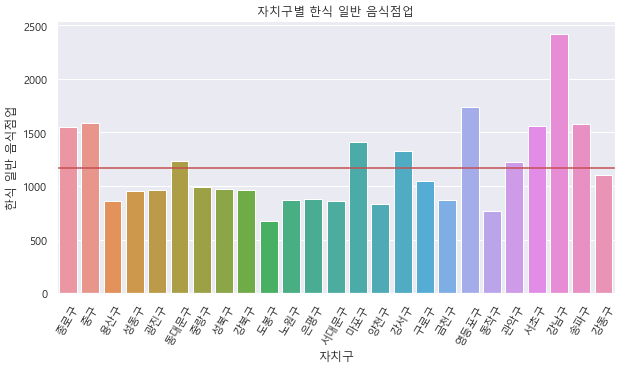

In [89]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(10,5))
sns.barplot(x='자치구', y='한식 일반 음식점업', data=df)
plt.axhline(df['한식 일반 음식점업'].mean(), c='r')
plt.title('자치구별 한식 일반 음식점업')
plt.xlabel('자치구')
plt.ylabel('한식 일반 음식점업')
plt.xticks(rotation=60)
plt.show()

In [83]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df.sort_values(by='한식 일반 음식점업', ascending=False)

,자치구,한식 일반 음식점업,택시운송업,남녀용 겉옷 및 셔츠 도매업
22,강남구,2415,1796,384
18,영등포구,1738,1349,76
1,중구,1588,230,10810
23,송파구,1575,2638,147
21,서초구,1564,417,157
0,종로구,1548,215,400
13,마포구,1411,1165,96
15,강서구,1325,3735,78
5,동대문구,1236,1546,211
20,관악구,1226,1286,31


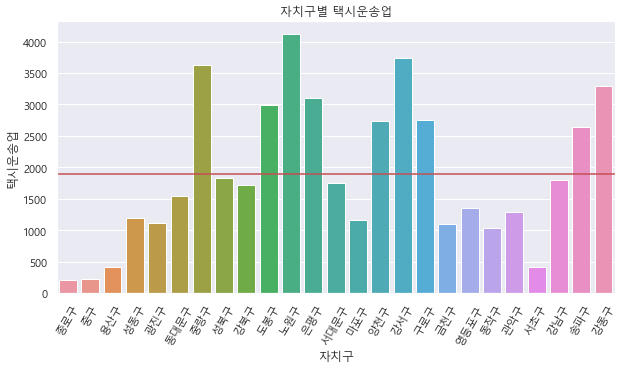

In [90]:
plt.figure(figsize=(10,5))
sns.barplot(x='자치구', y='택시운송업', data=df)
plt.axhline(df['택시운송업'].mean(), c='r')
plt.title('자치구별 택시운송업')
plt.xlabel('자치구')
plt.ylabel('택시운송업')
plt.xticks(rotation=60)
plt.show()

In [85]:
df.sort_values(by='택시운송업', ascending=False)

,자치구,한식 일반 음식점업,택시운송업,남녀용 겉옷 및 셔츠 도매업
10,노원구,866,4114,30
15,강서구,1325,3735,78
6,중랑구,991,3634,63
24,강동구,1101,3295,59
11,은평구,881,3108,26
9,도봉구,672,2993,22
16,구로구,1048,2757,114
14,양천구,831,2735,25
23,송파구,1575,2638,147
7,성북구,973,1835,85


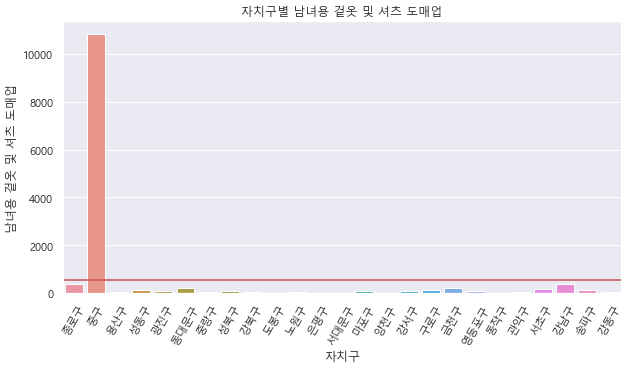

In [91]:
plt.figure(figsize=(10,5))
sns.barplot(x='자치구', y='남녀용 겉옷 및 셔츠 도매업', data=df)
plt.axhline(df['남녀용 겉옷 및 셔츠 도매업'].mean(), c='r')
plt.title('자치구별 남녀용 겉옷 및 셔츠 도매업')
plt.xlabel('자치구')
plt.ylabel('남녀용 겉옷 및 셔츠 도매업')
plt.xticks(rotation=60)
plt.show()

In [87]:
df.sort_values(by='남녀용 겉옷 및 셔츠 도매업', ascending=False)

,자치구,한식 일반 음식점업,택시운송업,남녀용 겉옷 및 셔츠 도매업
1,중구,1588,230,10810
0,종로구,1548,215,400
22,강남구,2415,1796,384
5,동대문구,1236,1546,211
17,금천구,867,1100,200
21,서초구,1564,417,157
3,성동구,956,1200,149
23,송파구,1575,2638,147
16,구로구,1048,2757,114
13,마포구,1411,1165,96


# 추가분석

In [117]:
# 전체 개수별 정렬
seoul_business = pd.read_csv('1.4 business_type_202401.csv', sep=",", encoding = "UTF-8", header=1)
seoul_business = seoul_business[ seoul_business['동']=='합계']
seoul_business=seoul_business.drop('동', axis=1)
seoul_business=seoul_business.T
seoul_business=seoul_business.drop('자치구')
seoul_business.sort_values(by=1, ascending=False)

,1
택시운송업.1,"76,701"
커피전문점.1,"57,322"
남녀용 겉옷 및 셔츠 도매업.1,"51,116"
일반 교과 학원.1,"50,773"
택시운송업,"47,176"
한식 육류요리 전문점.1,"44,653"
부동산 중개 및 대리업.1,"42,636"
두발미용업.1,"36,214"
기타주점업.1,"31,371"
용달 화물자동차 운송업.1,"29,356"


In [ ]:
seoul_business.columns

Index(['자치구', '택시운송업', '택시운송업.1', '한식 일반 음식점업', '한식 일반 음식점업.1', '용달 화물자동차 운송업',
       '용달 화물자동차 운송업.1', '부동산 중개 및 대리업', '부동산 중개 및 대리업.1', '두발미용업', '두발미용업.1',
       '커피전문점', '커피전문점.1', '남녀용 겉옷 및 셔츠 도매업', '남녀용 겉옷 및 셔츠 도매업.1', '기타주점업',
       '기타주점업.1', '일반 교과 학원', '일반 교과 학원.1', '한식 육류요리 전문점', '한식 육류요리 전문점.1'],
      dtype='object')

# 추가분석2

In [120]:
seoul_business = pd.read_csv('1.4 business_type_202401.csv', sep=",", encoding = "UTF-8", header=1)

In [121]:
seoul_business.columns

Index(['자치구', '동', '택시운송업', '택시운송업.1', '한식 일반 음식점업', '한식 일반 음식점업.1',
       '용달 화물자동차 운송업', '용달 화물자동차 운송업.1', '부동산 중개 및 대리업', '부동산 중개 및 대리업.1',
       '두발미용업', '두발미용업.1', '커피전문점', '커피전문점.1', '남녀용 겉옷 및 셔츠 도매업',
       '남녀용 겉옷 및 셔츠 도매업.1', '기타주점업', '기타주점업.1', '일반 교과 학원', '일반 교과 학원.1',
       '한식 육류요리 전문점', '한식 육류요리 전문점.1'],
      dtype='object')

In [128]:
sseoul_business_main = seoul_business[['자치구','동','커피전문점.1','기타주점업.1','일반 교과 학원.1', '한식 육류요리 전문점.1','한식 일반 음식점업.1','택시운송업.1', '남녀용 겉옷 및 셔츠 도매업.1']]
seoul_business_main_total = sseoul_business_main[ seoul_business_main['동']=='소계']
seoul_business_main_total=seoul_business_main_total.drop('동', axis=1)
seoul_business_main_total

,자치구,커피전문점.1,기타주점업.1,일반 교과 학원.1,한식 육류요리 전문점.1,한식 일반 음식점업.1,택시운송업.1,남녀용 겉옷 및 셔츠 도매업.1
2,종로구,"3,613","1,413",382,"1,982","5,912",215,962
20,중구,"3,542",982,175,"2,121","6,414",235,"24,248"
36,용산구,"2,076","1,332",573,"1,184","2,987",523,317
53,성동구,"1,859",621,"1,494","1,545","2,785","2,527","1,572"
71,광진구,"1,887","1,577","1,646","1,678","2,861","1,744",687
87,동대문구,"1,472","1,082",984,"1,509","3,566","2,093",976
102,중랑구,"1,037","1,000","1,045","1,504","2,479","6,262",284
119,성북구,"1,384","1,030","1,755","1,334","2,822","2,643",454
140,강북구,"1,095","1,275",740,"1,176","2,663","2,589",94
154,도봉구,837,477,"1,162",943,"2,009","5,783",43


In [ ]:
# # 시각화
# plt.figure(figsize=(10,5))
# sns.barplot(x='자치구', y='커피전문점.1', data=seoul_business_main_total)
# plt.axhline(df['남녀용 겉옷 및 셔츠 도매업'].mean(), c='r')
# plt.title('자치구별 남녀용 겉옷 및 셔츠 도매업')
# plt.xlabel('자치구')
# plt.ylabel('남녀용 겉옷 및 셔츠 도매업')
# plt.xticks(rotation=60)
# plt.show()

In [134]:
seoul_business_main_total[['자치구','커피전문점.1']].sort_values(by='커피전문점.1', ascending=False) #

,자치구,커피전문점.1
154,도봉구,837
381,강남구,"7,273"
221,마포구,"4,475"
362,서초구,"3,897"
2,종로구,"3,613"
20,중구,"3,542"
404,송파구,"3,372"
305,영등포구,"3,295"
257,강서구,"2,530"
36,용산구,"2,076"


In [136]:
seoul_business_main_total[['자치구','기타주점업.1']].sort_values(by='기타주점업.1', ascending=False)

,자치구,기타주점업.1
20,중구,982
324,동작구,955
189,은평구,925
238,양천구,851
169,노원구,844
294,금천구,685
53,성동구,621
154,도봉구,477
221,마포구,"2,559"
381,강남구,"2,528"


In [137]:
seoul_business_main_total[['자치구','일반 교과 학원.1']].sort_values(by='일반 교과 학원.1', ascending=False)

,자치구,일반 교과 학원.1
87,동대문구,984
381,강남구,"9,020"
140,강북구,740
36,용산구,573
238,양천구,"5,804"
294,금천구,487
404,송파구,"4,160"
2,종로구,382
362,서초구,"3,812"
169,노원구,"3,281"


In [138]:
seoul_business_main_total[['자치구','한식 육류요리 전문점.1']].sort_values(by='한식 육류요리 전문점.1', ascending=False)

,자치구,한식 육류요리 전문점.1
154,도봉구,943
381,강남구,"5,008"
221,마포구,"2,928"
404,송파구,"2,781"
362,서초구,"2,338"
257,강서구,"2,274"
305,영등포구,"2,151"
20,중구,"2,121"
2,종로구,"1,982"
71,광진구,"1,678"


In [139]:
seoul_business_main_total[['자치구','한식 일반 음식점업.1']].sort_values(by='한식 일반 음식점업.1', ascending=False) #

,자치구,한식 일반 음식점업.1
362,서초구,"6,712"
305,영등포구,"6,476"
20,중구,"6,414"
2,종로구,"5,912"
404,송파구,"5,760"
221,마포구,"4,705"
257,강서구,"4,584"
340,관악구,"3,689"
87,동대문구,"3,566"
432,강동구,"3,388"


In [140]:
seoul_business_main_total[['자치구','택시운송업.1']].sort_values(by='택시운송업.1', ascending=False)

,자치구,택시운송업.1
362,서초구,903
257,강서구,"6,922"
102,중랑구,"6,262"
169,노원구,"6,074"
36,용산구,523
154,도봉구,"5,783"
432,강동구,"4,980"
238,양천구,"4,942"
404,송파구,"4,850"
189,은평구,"4,430"


In [141]:
seoul_business_main_total[['자치구','남녀용 겉옷 및 셔츠 도매업.1']].sort_values(by='남녀용 겉옷 및 셔츠 도매업.1', ascending=False) ##

,자치구,남녀용 겉옷 및 셔츠 도매업.1
87,동대문구,976
2,종로구,962
140,강북구,94
278,구로구,923
381,강남구,"8,320"
189,은평구,74
257,강서구,700
71,광진구,687
206,서대문구,68
238,양천구,52


In [ ]:
# 추가분석2 결과
커피전문점.1, 기타주점업.1, 한식 육류요리 전문점.1, 한식 일반 음식점업.1, 남녀용 겉옷 및 셔츠 도매업.1
중구와 연관

In [ ]:
# 추가분석3

In [142]:
seoul_business = pd.read_csv('1.4 business_type_202401.csv', sep=",", encoding = "UTF-8", header=1)
seoul_business.columns

Index(['자치구', '동', '택시운송업', '택시운송업.1', '한식 일반 음식점업', '한식 일반 음식점업.1',
       '용달 화물자동차 운송업', '용달 화물자동차 운송업.1', '부동산 중개 및 대리업', '부동산 중개 및 대리업.1',
       '두발미용업', '두발미용업.1', '커피전문점', '커피전문점.1', '남녀용 겉옷 및 셔츠 도매업',
       '남녀용 겉옷 및 셔츠 도매업.1', '기타주점업', '기타주점업.1', '일반 교과 학원', '일반 교과 학원.1',
       '한식 육류요리 전문점', '한식 육류요리 전문점.1'],
      dtype='object')

In [143]:
sseoul_business_main = seoul_business[['자치구','동','커피전문점','기타주점업','일반 교과 학원', '한식 육류요리 전문점']]
seoul_business_main_total = sseoul_business_main[ seoul_business_main['동']=='소계']
seoul_business_main_total=seoul_business_main_total.drop('동', axis=1)
seoul_business_main_total

,자치구,커피전문점,기타주점업,일반 교과 학원,한식 육류요리 전문점
2,종로구,948,537,110,437
20,중구,869,381,57,443
36,용산구,634,487,104,300
53,성동구,547,285,258,400
71,광진구,590,633,413,467
87,동대문구,494,499,302,442
102,중랑구,381,535,288,499
119,성북구,457,512,464,365
140,강북구,358,580,220,362
154,도봉구,288,258,351,302


In [144]:
seoul_business_main_total[['자치구','커피전문점']].sort_values(by='커피전문점', ascending=False)

,자치구,커피전문점
404,송파구,975
2,종로구,948
20,중구,869
305,영등포구,838
257,강서구,690
36,용산구,634
71,광진구,590
340,관악구,581
53,성동구,547
432,강동구,546


In [145]:
seoul_business_main_total[['자치구','기타주점업']].sort_values(by='기타주점업', ascending=False)

,자치구,기타주점업
257,강서구,794
381,강남구,713
340,관악구,658
305,영등포구,636
71,광진구,633
404,송파구,628
432,강동구,589
140,강북구,580
278,구로구,576
2,종로구,537


In [146]:
seoul_business_main_total[['자치구','일반 교과 학원']].sort_values(by='일반 교과 학원', ascending=False)

,자치구,일반 교과 학원
404,송파구,876
362,서초구,812
169,노원구,735
257,강서구,672
432,강동구,620
20,중구,57
189,은평구,551
221,마포구,469
119,성북구,464
71,광진구,413


In [147]:
seoul_business_main_total[['자치구','한식 육류요리 전문점']].sort_values(by='한식 육류요리 전문점', ascending=False)

,자치구,한식 육류요리 전문점
381,강남구,827
221,마포구,701
404,송파구,639
257,강서구,581
102,중랑구,499
305,영등포구,494
189,은평구,476
71,광진구,467
362,서초구,445
20,중구,443


In [92]:
# 기존결과
# 위 차트를 통해 알게된 사실
# 서울시 구별 업종 등록 데이터

# 종사자수 기준 업종 확인 
# 1. 한식 일반 음식점업 = 강남, 영등포, 중구 / 양천, 동작, 도봉 // 1000 넘는 지역 12곳
# 2. 택시운송업 = 노원, 강서, 중랑, 강동, 은평 (3000이상) / 서초, 용산, 중구, 종로 (500이하) // 1000이상 21곳
# 3. 남녀용 겉옷 및 셔츠 도매업 = 중구, 종로, 강남 / 도봉, 서대문, 동작 // 중구 쇼핑몰,광광지 등으로 압도적 1위(10810)

In [ ]:
### df['택시운송업'][20].replace(",", "") # replace는 한개값 변경